In [ ]:
#for graph and plots

In [8]:
#summary statistics 
# importing library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
# defining the file paths 

file_paths = [
    '/Users/milkiyassolo/Documents/10acc/Moonlight_Energy_Project/data/benin-malanville.csv',
    '/Users/milkiyassolo/Documents/10acc/Moonlight_Energy_Project/data/sierraleone-bumbuna.csv',
    '/Users/milkiyassolo/Documents/10acc/Moonlight_Energy_Project/data/togo-dapaong_qc.csv'
]

In [10]:
#preparing a country name
countries = ['Benin', 'Sierra Leone', 'Togo']

In [11]:
#preparing a container to store dataframe
dfs = []

In [12]:
# Read and add 'Country' column
for file_path, country in zip(file_paths, countries):
    df = pd.read_csv(file_path)
    df["Country"] = country  # Add a country column
    dfs.append(df)

In [13]:
# Merge the dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

In [14]:
# Ensure that Timestamp is in datetime format for proper plotting
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

/var/folders/ys/j5hy15g16bjc5b29zsfb5w3c0000gn/T/ipykernel_63062/520874281.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ghi, x='Country', y='GHI', palette='viridis')


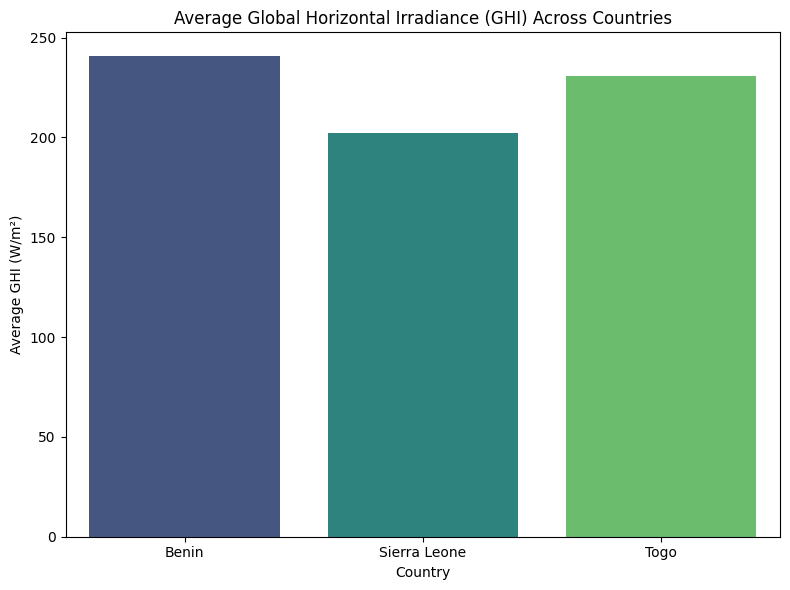

In [15]:
#Plots and Graphs
# Calculate average GHI for each country
avg_ghi = merged_df.groupby('Country')['GHI'].mean().reset_index()

# Plot average GHI comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_ghi, x='Country', y='GHI', palette='viridis')
plt.title('Average Global Horizontal Irradiance (GHI) Across Countries')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.tight_layout()
plt.show()

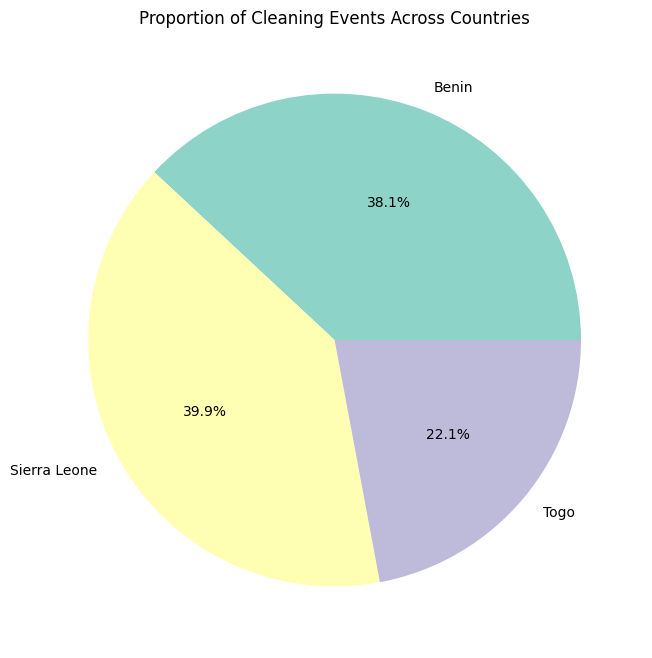

In [16]:
# Calculate the proportion of cleaning events for each country
cleaning_proportion = merged_df.groupby('Country')['Cleaning'].mean().reset_index()

# Plot pie chart for cleaning proportions
plt.figure(figsize=(8, 8))
plt.pie(cleaning_proportion['Cleaning'], labels=cleaning_proportion['Country'], autopct='%1.1f%%', colors=sns.color_palette("Set3", len(cleaning_proportion)))
plt.title('Proportion of Cleaning Events Across Countries')
plt.show()


/var/folders/ys/j5hy15g16bjc5b29zsfb5w3c0000gn/T/ipykernel_63062/3994926079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Country', y='Tamb', palette='coolwarm')


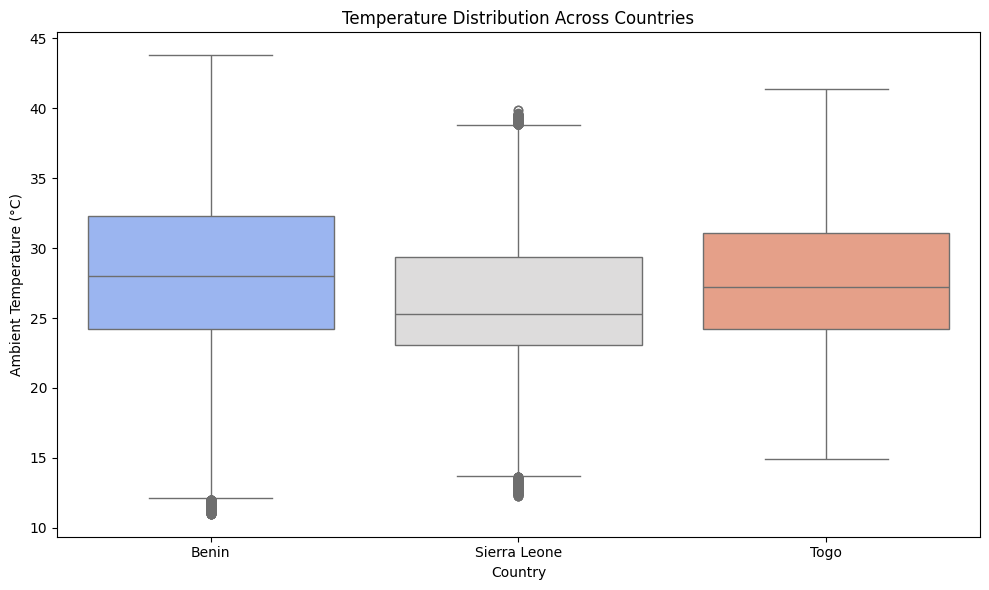

In [17]:
# Boxplot for ambient temperature comparison across countries
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Country', y='Tamb', palette='coolwarm')
plt.title('Temperature Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()
